In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
cwd = os.getcwd()
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette(sns.diverging_palette(230, 20, n=6))

SAVEPLOTS = True

SAVEDIR = "../plots/mf-hubbard"
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

# Define the hopping geometries

In [2]:
def oneDimensionalChain(N):
    HoppingMatrix = np.zeros( ( N , N ) )
    ##  Set the elements of the hopping matrix that define PBC corresponding to the ends of the 1D chain
    HoppingMatrix[0, 1] += 1.;
    HoppingMatrix[0, N - 1] += 1.;
    HoppingMatrix[N - 1, 0] += 1.;
    HoppingMatrix[N - 1, N - 2] += 1.;
    ##  Set the remaining ones
    for i in range(1, N - 1):
        HoppingMatrix[i, i - 1] += 1; HoppingMatrix[i, i + 1] += 1;
    return HoppingMatrix

def iRibbon(x, y, z, Nx, Ny):
    return Nx * Ny * z + Nx * y + x

def nanoribbon(N, Ny):
    Nx = int(N / Ny / 2)
    K = np.zeros((2 * Nx * Ny, 2 * Nx * Ny))
    for x in range(Nx):
        for y in range(Ny):
            if y == (Ny - 1) :
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
            else:
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
    for x in range(Nx):
        for y in range(Ny):
            if y == 0 :
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
            else:
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1

    return K

# Mean field for a 1D Hubbard Chain. Uniform electron density ansatz

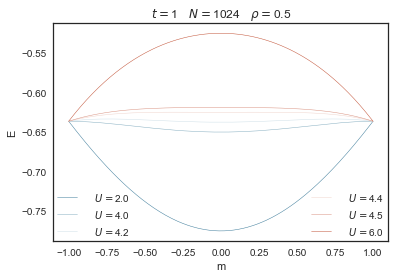

In [60]:
Us = np.array([2., 4., 4.2, 4.4, 4.5, 6.])

fig = plt.figure(0)
ax = fig.add_subplot(111)
plt.xlabel(r'm')
plt.ylabel(r'E')

N = 1024
filling = 2 # 2 : quarter filling
Np = int(N / filling)
t = 1

K = oneDimensionalChain(N)

#K = nanoribbon(N, 8)

for idx, U in enumerate(Us):
    
    Nup = np.arange(Np+1)
    Ndown = Np - Nup
    k = 2 * np.pi / N * np.arange(-N / 2 + 1, N/2 + 1)

    nUp = Nup / N
    nDown = Ndown / N

    eUp = - 2 * t * np.cos(k)
    eDown = eUp
    
    #eUp = la.eigvals(K)
    #eDown = eUp

    E = np.zeros(Np+1)
    m = np.zeros(Np+1)

    for fill in range(Np + 1):
        E[fill] = np.sum( np.sort(eUp)[:int(Nup[fill])] + U * nDown[fill] ) / N \
        + np.sum( np.sort(eDown)[:int(Ndown[fill])] + U * nUp[fill] ) / N \
        - U * nDown[fill] * nUp[fill]
        m[fill] = (Nup[fill] - Ndown[fill]) / Np
    
    ax.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 0.5)
    lgd = ax.legend(loc=4, borderaxespad=0., ncol = 2, columnspacing = 0.5, fontsize = 'small', mode = "expand")
    plt.title(r'$t=$' + r'' + str(t) + r'$\quadN=$' \
              + r'' + str(N) + r'$\quad\rho=$' + r'' + str(1/filling))

if SAVEPLOTS == True:
    plt.savefig(SAVEDIR + "/mf-hubbard-1d-quarter-filling" + '.png', dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

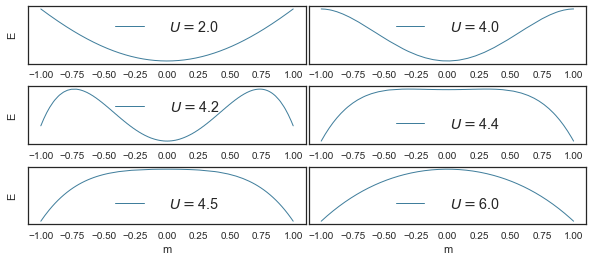

In [81]:
f = plt.figure(figsize=(10,4))
f.subplots_adjust(hspace=0.4, wspace=0.01)
nCols = 2

for idx, U in enumerate(Us):
    N = 1024
    filling = 2 # 2 : quarter filling
    Np = int(N / filling)
    t = 1
    Nup = np.arange(Np+1)
    Ndown = Np - Nup
    #k = 2 * np.pi / N * np.arange(-N / 2 + 1, N/2 + 1)

    nUp = Nup / N
    nDown = Ndown / N
    
    eUp = - 2 * t * np.cos(k)
    eDown = eUp
    
    #eUp = la.eigvals(K)
    #eDown = eUp

    E = np.zeros(Np+1)
    m = np.zeros(Np+1)

    for fill in range(Np + 1):
        E[fill] = np.sum( np.sort(eUp)[:int(Nup[fill])] + U * nDown[fill] ) / N \
        + np.sum( np.sort(eDown)[:int(Ndown[fill])] + U * nUp[fill] ) / N \
        - U * nDown[fill] * nUp[fill]
        m[fill] = (Nup[fill] - Ndown[fill]) / Np
    
    ax = f.add_subplot(Us.size/nCols, nCols, idx + 1)
    ax.plot(m, E, label = '$\quadU=$' + r'' + str(U), linewidth = 1)
    
    lgd = ax.legend(fontsize = 'large')
    if (idx + 1) > nCols:
        ax.set_xlabel(r'm')
    if (idx + nCols) % nCols == 0:
        ax.set_ylabel(r'E')
    ax.set_yticklabels([])
    
if SAVEPLOTS == True:
    plt.savefig(SAVEDIR + "/mf-hubbard-1d-quarter-filling-multiple" + '.png', dpi = 400, bbox_inches='tight')

# Non-uniform electron density ansatz

## Define the fermi function for both zero and finite temperature

In [3]:
def fermi(e, mu, beta):
    '''
    For zero temperature, set beta = 99999
    '''
    if beta == 99999:
        return (e < mu).astype(int)
    else:
        return 1 / ( 1 + np.exp( beta * ( e - mu ) ) )

## Plot function

In [11]:
SAVESUBDIR = "/nanoribbon-half-filling"
if not os.path.exists(SAVEDIR + SAVESUBDIR):
    os.makedirs(SAVEDIR + SAVESUBDIR)

def plot(nUp, nDown, energies, itSwitch, Nx, Ny, itMax, lastNit):
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left \langle n_{i,\sigma} \right\rangle$')

    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.set_palette(flatui)
    ax.plot(np.arange(N) + 1, nUp, color = "#e74c3c"\
            , label = r'$\left \langle n_{i,\uparrow} \right\rangle$',\
           linewidth = 1)
    ax.plot(np.arange(N) + 1, nDown, color = "#95a5a6"\
            , label = r'$\left \langle n_{i,\downarrow} \right\rangle$',\
           linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1),\
                    loc=2, borderaxespad=0.)
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/densities" + '.png',\
                    dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

    plt.figure(1)
    plt.plot(nUp - nDown, color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left\langle m_{i} \right\rangle$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/magnetization" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(2)
    plt.plot(abs(nUp - nDown), color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$| \left\langle m_{i} \right\rangle |$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/AbsMagnetization" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(3)
    plt.plot(np.arange(energies[itSwitch:].size) + itSwitch, energies[itSwitch:], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$F$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFafterAnnealing" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(4)
    plt.plot(np.arange(energies.size) , energies, color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$F$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFtotal" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(5)
    plt.plot(np.arange(energies[itMax-lastNit:].size) + (itMax - lastNit)\
             , energies[itMax-lastNit:], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$F$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFlastNit" + '.png', dpi = 600, bbox_inches='tight')


    a1 = np.arange(Nx)
    a2 = np.arange(Ny)
    vs = np.zeros((2 * Nx * Ny , 2))
    lat = np.zeros((2 * Nx * Ny))
    clr = np.chararray((2 * Nx * Ny), itemsize = 10)
    v1 = np.array([1, 0])
    v2 = np.array([1 / 2, np.sqrt(3) / 2])
    for i in range(Nx):
        for j in range(Ny):
            for k in range(2):
                vs[Nx * Ny * k + Nx * j + i, :] =\
                a1[i] * v1 + a2[j] * v2 + k *\
                np.array([1 / 2,- 1 / ( 2 * np.sqrt(3) )])
                lat[Nx * Ny * k + Nx * j + i]\
                =  400 * (nUp[Nx * Ny * k + Nx * j + i]\
                          - nDown[Nx * Ny * k + Nx * j + i] )
                if k == 0 :
                    clr[Nx * j + i] = "#e74c3c"
                if k == 1 :
                    clr[Nx * Ny + Nx * j + i] = "#95a5a6"

    fig = plt.figure(6)
    ax = fig.add_subplot(111)
    ax.scatter(vs[:, 0], vs[:, 1], s = abs(lat),\
               c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
    ax.axis('equal')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/MFnanoribbon.png", dpi = 400)

## Reproduce results for a nanoribbon

In [85]:
N = 256 # number of sites
beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 50 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 1.2 # on-site interaction
muPHS = 0 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 100
it = 0
lbda = 0.5 / itMax
itSwitch = 0
dampFreq = 1
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
Ny = 8
Nx = int(N / 2 / Ny)
K = nanoribbon(N, Ny)

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

nUp = np.array([1 , 0])
for i in range(int(N/2) - 1):
    nUp = np.concatenate((nUp, np.array([1, 0]) ))

nDown = np.array([0, 1])
for i in range(int(N/2) - 1):
    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# Initialize energies
energies = np.zeros(itMax)

while (it < itMax): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - nUp * nDown
    
    Hup = - t * K + U * np.eye(N) * ( nDown + C / 2 / N )
    Hdown = - t * K + U * np.eye(N) * ( nUp + C / 2 / N )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(N):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(N):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        nUp = ( 1 / 2 + lbda * it ) * nUp\
        + ( 1 / 2 - lbda * it) * nUpOld
        nDown = ( 1 / 2 + lbda * it ) * nDown\
        + ( 1 / 2 - lbda * it) * nDownOld

    # To check convergence
    print('delta nUp: ', np.dot(nUp - nUpOld, nUp - nUpOld) / N**2)
    print('delta nDown: ', np.dot(nDown - nDownOld, nDown - nDownOld) / N**2)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / N )
    
    energies[it] = U / N * np.dot(nUp, nDown) + mu * (nUp + nDown).sum() / N\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1

beta:  1.0
delta nUp:  0.00048828125
delta nDown:  0.00048828125
<n>:  0.5
beta:  1.1
delta nUp:  0.000124078071526
delta nDown:  0.000124106985254
<n>:  0.797991857222
beta:  1.2100000000000002
delta nUp:  2.82525400221e-05
delta nDown:  2.82597462089e-05
<n>:  0.919892493513
beta:  1.3310000000000004
delta nUp:  7.44927193115e-06
delta nDown:  7.45096066844e-06
<n>:  0.968768560153
beta:  1.4641000000000004
delta nUp:  2.27692903199e-06
delta nDown:  2.2773151761e-06
<n>:  0.988035991627
beta:  1.6105100000000006
delta nUp:  7.72367802625e-07
delta nDown:  7.72454067717e-07
<n>:  0.995521784413
beta:  1.7715610000000008
delta nUp:  2.76921447474e-07
delta nDown:  2.76940291263e-07
<n>:  0.998394034237
beta:  1.9487171000000012
delta nUp:  1.01562499621e-07
delta nDown:  1.01566526841e-07
<n>:  0.999483731911
beta:  2.1435888100000016
delta nUp:  3.74241681253e-08
delta nDown:  3.742501059e-08
<n>:  0.999892040482
beta:  2.357947691000002
delta nUp:  1.372186412e-08
delta nDown:  1.37

delta nUp:  9.139675551e-19
delta nDown:  9.317756891e-19
<n>:  1.00000604294
beta:  50
delta nUp:  6.58879867824e-19
delta nDown:  1.35218968209e-18
<n>:  1.00000604294
beta:  50
delta nUp:  5.74677442789e-19
delta nDown:  9.18675571954e-19
<n>:  1.00000604294
beta:  50
delta nUp:  1.13244643872e-18
delta nDown:  3.4354318914e-19
<n>:  1.00000604294
beta:  50
delta nUp:  2.62299134821e-17
delta nDown:  3.350818472e-19
<n>:  1.00000604294
beta:  50
delta nUp:  2.21710944655e-17
delta nDown:  6.69847406924e-19
<n>:  1.00000604294
beta:  50
delta nUp:  2.00535638262e-19
delta nDown:  8.31950929577e-19
<n>:  1.00000604294
beta:  50
delta nUp:  1.89959344735e-19
delta nDown:  6.43658410799e-19
<n>:  1.00000604294
beta:  50
delta nUp:  2.05042018829e-19
delta nDown:  6.72472088054e-19
<n>:  1.00000604293
beta:  50
delta nUp:  7.00588687555e-19
delta nDown:  1.67865163678e-18
<n>:  1.00000604293
beta:  50
delta nUp:  6.93753692848e-19
delta nDown:  1.73889576896e-18
<n>:  1.00000604293
beta:

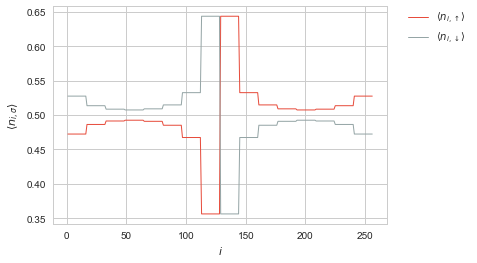

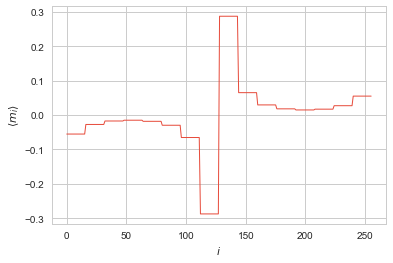

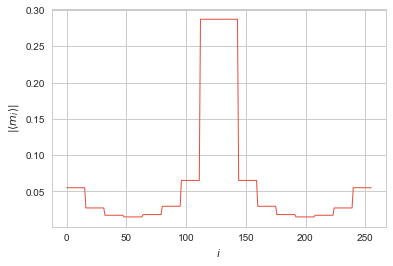

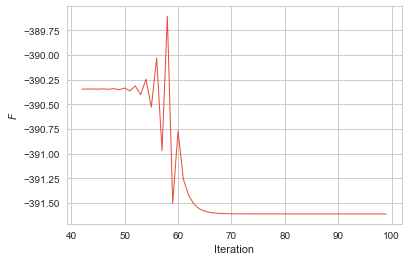

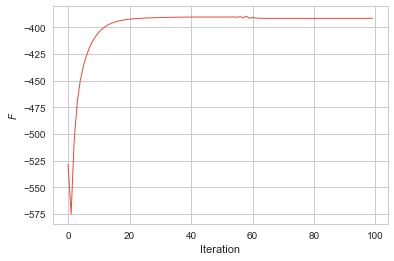

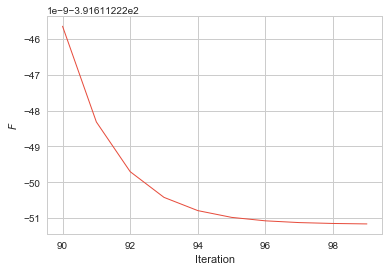

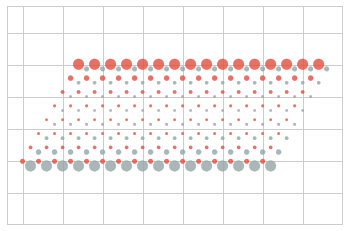

In [86]:
lastNit = 10
plot(nUp, nDown, energies, itSwitch, Nx, Ny, itMax, lastNit)

In [4]:
def iTriang(x, y, Nx, Ny):
    return Nx * y + x

def triangular(Nx, Ny, nOrb, hoppings):
    T = np.zeros((nOrb*Nx*Ny, nOrb*Nx*Ny))
    for x in range(Nx):
        for y in range(Ny):
            # Diagonal term
            T[ iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1) * nOrb,\
              iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1) * nOrb ]\
            = hoppings[0]
            
            # E1
            T[ iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1)*nOrb,\
              iTriang( (x + 1) % Nx , y, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y, Nx, Ny) + 1)*nOrb ]\
            = hoppings[1]
            
            # E4
            T[ iTriang( (x + 1) % Nx , y, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y, Nx, Ny) + 1)*nOrb\
              , iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb ] = hoppings[4]
            
            if y == 0:
                T[ iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 1, Nx, Ny)*nOrb:(iTriang( x, 1, Nx, Ny)+1)*nOrb ]\
                = hoppings[6]
                
                T[ iTriang(x, 1, Nx, Ny)*nOrb:(iTriang(x, 1, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb ]\
                = hoppings[3]
                
                # Periodic
                T[ iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                  iTriang( x, Ny - 1, Nx, Ny)*nOrb:(iTriang( x, Ny - 1, Nx, Ny)+1)*nOrb ]\
                = hoppings[3]
                T[ iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb ]\
                = hoppings[6]
                
                T[ iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                  iTriang( ( x + 1 ) % Nx, Ny - 1, Nx, Ny)*nOrb:(iTriang( ( x + 1 ) % Nx, Ny - 1, Nx, Ny)+1)*nOrb ]\
                = hoppings[2]
                T[iTriang( ( x + 1 ) % Nx, Ny - 1, Nx, Ny)*nOrb:(iTriang( ( x + 1 ) % Nx, Ny - 1, Nx, Ny)+1)*nOrb,\
                iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                = hoppings[5]
                
                #
                if x == 0:
                    T[iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny) + 1)*nOrb,\
                      iTriang( Nx - 1, 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, 1, Nx, Ny) + 1)*nOrb]\
                    = hoppings[5]
                    T[iTriang( Nx - 1, 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
                else:
                    T[iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                      iTriang( x - 1, 1, Nx, Ny)*nOrb:(iTriang( x - 1, 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x - 1, 1, Nx, Ny)*nOrb:(iTriang(x - 1, 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
            else:
                if y == Ny - 1:
                    T[iTriang(x, Ny - 1 , Nx, Ny)*nOrb:(iTriang(x, Ny - 1 , Nx, Ny) + 1)*nOrb,\
                      iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny) + 1)*nOrb]\
                    = hoppings[2]
                    T[iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)+1)*\
                      nOrb, iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, Ny - 2, Nx, Ny)*nOrb:(iTriang( x, Ny - 2, Nx, Ny)+1)*nOrb]\
                    = hoppings[3]
                    T[iTriang(x, Ny - 2, Nx, Ny)*nOrb:(iTriang(x, Ny - 2, Nx, Ny)+1)*nOrb,\
                      iTriang( x, Ny - 1, Nx, Ny)*nOrb:(iTriang( x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[6]
                    # Periodic 
                    T[iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[6]
                    T[iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb,\
                      iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[3]
                    if x == 0:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang( Nx - 1, 0, Nx, Ny)*nOrb:(iTriang( Nx - 1, 0, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang( Nx - 1, 0, Nx, Ny)*nOrb:(iTriang( Nx - 1, 0, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
                    else:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang(x - 1, 0, Nx, Ny)*nOrb:(iTriang(x - 1, 0, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang(x - 1, 0, Nx, Ny)*nOrb:(iTriang(x - 1, 0, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
                    #
                else:
                    T[iTriang(x, y , Nx, Ny)*nOrb:(iTriang(x, y , Nx, Ny)+1)*nOrb,\
                      iTriang( (x + 1) % Nx , y - 1, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
                    T[iTriang( (x + 1) % Nx , y - 1, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y - 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                      iTriang( x, y - 1, Nx, Ny)*nOrb:(iTriang( x, y - 1, Nx, Ny)+1)*nOrb] = hoppings[3]
                    T[iTriang(x, y - 1, Nx, Ny)*nOrb:(iTriang(x, y - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, y, Nx, Ny)*nOrb:(iTriang( x, y, Nx, Ny)+1)*nOrb] = hoppings[6]
                    if x == 0:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang( Nx - 1, y + 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, y + 1, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang( Nx - 1, y + 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, y + 1, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
                    else:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang(x - 1, y + 1, Nx, Ny)*nOrb:(iTriang(x - 1, y + 1, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang(x - 1, y + 1, Nx, Ny)*nOrb:(iTriang(x - 1, y + 1, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
    return T



def triangularNano(Nx, Ny, nOrb, hoppings):
    T = np.zeros((nOrb*Nx*Ny, nOrb*Nx*Ny))
    for x in range(Nx):
        for y in range(Ny):
            # Diagonal term
            T[ iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1) * nOrb,\
              iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1) * nOrb ]\
            = hoppings[0]
            
            # E1
            T[ iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny) + 1)*nOrb,\
              iTriang( (x + 1) % Nx , y, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y, Nx, Ny) + 1)*nOrb ]\
            = hoppings[1]
            
            # E4
            T[ iTriang( (x + 1) % Nx , y, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y, Nx, Ny) + 1)*nOrb\
              , iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb ] = hoppings[4]
            
            if y == 0:
                T[ iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 1, Nx, Ny)*nOrb:(iTriang( x, 1, Nx, Ny)+1)*nOrb ]\
                = hoppings[6]
                
                T[ iTriang(x, 1, Nx, Ny)*nOrb:(iTriang(x, 1, Nx, Ny)+1)*nOrb,\
                  iTriang( x, 0, Nx, Ny)*nOrb:(iTriang( x, 0, Nx, Ny)+1)*nOrb ]\
                = hoppings[3]
            
                if x == 0:
                    T[iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny) + 1)*nOrb,\
                      iTriang( Nx - 1, 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, 1, Nx, Ny) + 1)*nOrb]\
                    = hoppings[5]
                    T[iTriang( Nx - 1, 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
                else:
                    T[iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb,\
                      iTriang( x - 1, 1, Nx, Ny)*nOrb:(iTriang( x - 1, 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x - 1, 1, Nx, Ny)*nOrb:(iTriang(x - 1, 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, 0, Nx, Ny)*nOrb:(iTriang(x, 0, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
            else:
                if y == Ny - 1:
                    T[iTriang(x, Ny - 1 , Nx, Ny)*nOrb:(iTriang(x, Ny - 1 , Nx, Ny) + 1)*nOrb,\
                      iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny) + 1)*nOrb]\
                    = hoppings[2]
                    T[iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , Ny - 2, Nx, Ny)+1)*\
                      nOrb, iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x, Ny - 1, Nx, Ny)*nOrb:(iTriang(x, Ny - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, Ny - 2, Nx, Ny)*nOrb:(iTriang( x, Ny - 2, Nx, Ny)+1)*nOrb]\
                    = hoppings[3]
                    T[iTriang(x, Ny - 2, Nx, Ny)*nOrb:(iTriang(x, Ny - 2, Nx, Ny)+1)*nOrb,\
                      iTriang( x, Ny - 1, Nx, Ny)*nOrb:(iTriang( x, Ny - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[6]
                    
                else:
                    T[iTriang(x, y , Nx, Ny)*nOrb:(iTriang(x, y , Nx, Ny)+1)*nOrb,\
                      iTriang( (x + 1) % Nx , y - 1, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y - 1, Nx, Ny)+1)*nOrb]\
                    = hoppings[2]
                    T[iTriang( (x + 1) % Nx , y - 1, Nx, Ny)*nOrb:(iTriang( (x + 1) % Nx , y - 1, Nx, Ny)+1)*nOrb,\
                      iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                    = hoppings[5]
                    T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                      iTriang( x, y - 1, Nx, Ny)*nOrb:(iTriang( x, y - 1, Nx, Ny)+1)*nOrb] = hoppings[3]
                    T[iTriang(x, y - 1, Nx, Ny)*nOrb:(iTriang(x, y - 1, Nx, Ny)+1)*nOrb,\
                      iTriang( x, y, Nx, Ny)*nOrb:(iTriang( x, y, Nx, Ny)+1)*nOrb] = hoppings[6]
                    if x == 0:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang( Nx - 1, y + 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, y + 1, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang( Nx - 1, y + 1, Nx, Ny)*nOrb:(iTriang( Nx - 1, y + 1, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
                    else:
                        T[iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb,\
                          iTriang(x - 1, y + 1, Nx, Ny)*nOrb:(iTriang(x - 1, y + 1, Nx, Ny)+1)*nOrb]\
                        = hoppings[5]
                        T[iTriang(x - 1, y + 1, Nx, Ny)*nOrb:(iTriang(x - 1, y + 1, Nx, Ny)+1)*nOrb,\
                          iTriang(x, y, Nx, Ny)*nOrb:(iTriang(x, y, Nx, Ny)+1)*nOrb]\
                        = hoppings[2]
    return T

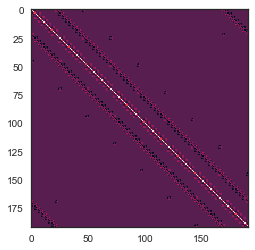

In [5]:
nOrb = 3
Nx = 8
Ny = 8

abs_t0 = 0.184

e1 = 1.046 / abs_t0
e2 = 2.104 / abs_t0
t0 = - 1
t1 = 0.401 / abs_t0
t2 = 0.507 / abs_t0
t11 = 0.218 / abs_t0
t12 = 0.338 / abs_t0
t22 = 0.057 / abs_t0

E0 = np.array([[e1, 0, 0],
               [0, e2, 0],
               [0, 0, e2]])

E1 = np.array([[t0, t1, t2],
               [-t1, t11, t12],
               [t2, -t12, t22]])

E4 = np.array([[t0, -t1, t2],
               [t1, t11, -t12],
               [t2, t12, t22]])

E2 = np.array([[t0, 0.5 * t1 - np.sqrt(3) / 2 * t2, - np.sqrt(3) / 2 * t1 - 0.5 * t2],
               [-0.5 * t1 - np.sqrt(3) / 2 * t2, 0.25 * ( t11 + 3 * t22 ), np.sqrt(3) / 4 * ( t22 - t11 ) - t12],
               [np.sqrt(3) / 2 * t1 - 0.5 * t2, np.sqrt(3) / 4 * ( t22 - t11 ) + t12, ( 3 * t11 + t22) / 4 ]])

E5 = np.array([[t0, - 0.5 * t1 - np.sqrt(3) / 2 * t2, np.sqrt(3) / 2 * t1 - 0.5 * t2],
               [0.5 * t1 - np.sqrt(3) / 2 * t2, 0.25 * ( t11 + 3 * t22 ), np.sqrt(3) / 4 * ( t22 - t11 ) + t12],
               [-np.sqrt(3) / 2 * t1 - 0.5 * t2, np.sqrt(3) / 4 * ( t22 - t11 ) - t12, ( 3 * t11 + t22) / 4 ]])

E3 = np.array([[t0, - 0.5 * t1 + np.sqrt(3) / 2 * t2, -np.sqrt(3) / 2 * t1 - 0.5 * t2],
               [0.5 * t1 + np.sqrt(3) / 2 * t2, 0.25 * ( t11 + 3 * t22 ), -np.sqrt(3) / 4 * ( t22 - t11 ) + t12],
               [np.sqrt(3) / 2 * t1 - 0.5 * t2, -np.sqrt(3) / 4 * ( t22 - t11 ) - t12, ( 3 * t11 + t22) / 4 ]])

E6 = np.array([[t0, 0.5 * t1 + np.sqrt(3) / 2 * t2, np.sqrt(3) / 2 * t1 - 0.5 * t2],
               [-0.5 * t1 + np.sqrt(3) / 2 * t2, 0.25 * ( t11 + 3 * t22 ), -np.sqrt(3) / 4 * ( t22 - t11 ) - t12],
               [-np.sqrt(3) / 2 * t1 - 0.5 * t2, -np.sqrt(3) / 4 * ( t22 - t11 ) + t12, ( 3 * t11 + t22) / 4 ]])

hoppings = np.array([E0, E1, E2, E3, E4, E5, E6])
orbitalHoppingsPBC = triangular(Nx, Ny, nOrb, hoppings)
plt.imshow(orbitalHoppingsPBC, interpolation='nearest')

In [6]:
orbitalHoppingsPBC

array([[  5.68478261,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  11.43478261,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  11.43478261, ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,   0.        , ...,   5.68478261,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         11.43478261,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  11.43478261]])

## Plot function TMD

In [26]:
def plotTMD(nUp, nDown, energies, itSwitch, Nx, Ny, lastNit, lastIt, dotscale):
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left \langle n_{i,\sigma} \right\rangle$')

    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.set_palette(flatui)

    nUpSite = np.zeros(Nx * Ny)
    nDownSite = np.zeros(Nx * Ny)
    for i in range(Nx * Ny):    
        nUpSite[i] = nUp[nOrb * i] + nUp[nOrb * i + 1] + nUp[nOrb * i + 2]
        nDownSite[i] = nDown[nOrb * i] + nDown[nOrb * i + 1] + nDown[nOrb * i + 2]

    ax.plot(np.arange(Nx * Ny), nUpSite, color = "#e74c3c"\
            , label = r'$\left \langle n_{i,\uparrow} \right\rangle$',\
           linewidth = 1)
    ax.plot(np.arange(Nx * Ny), nDownSite, color = "#95a5a6"\
            , label = r'$\left \langle n_{i,\downarrow} \right\rangle$',\
           linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1),\
                    loc=2, borderaxespad=0.)
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/densitiesTMD" + '.png',\
                    dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

    plt.figure(1)
    plt.plot(nUpSite - nDownSite, color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left\langle m_{i} \right\rangle$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/magnetizationTMD" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(2)
    plt.plot(abs(nUpSite - nDownSite), color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$| \left\langle m_{i} \right\rangle |$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/AbsMagnetizationTMD" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(3)
    plt.plot(np.arange(energies[itSwitch:lastIt].size) + itSwitch, energies[itSwitch:lastIt], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$\Omega$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFafterAnnealingTMD" + '.png', dpi = 600, bbox_inches='tight')


    plt.figure(4)
    plt.plot(np.arange(energies[:lastIt].size) , energies[:lastIt], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$\Omega$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFtotalTMD" + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(5)
    plt.plot(np.arange(energies[lastIt-lastNit:lastIt].size) + (lastIt - lastNit)\
             , energies[lastIt-lastNit:lastIt], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$\Omega$')
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/energyMFlastNitTMD" + '.png', dpi = 600, bbox_inches='tight')
        
    clr = np.chararray((Nx * Ny), itemsize = 10)
        
    a1 = np.arange(Nx)
    a2 = np.arange(Ny)
    vs = np.zeros((Nx * Ny , 2))
    lat = np.zeros((Nx * Ny))
    v1 = np.array([1, 0])
    v2 = np.array([1 / 2, np.sqrt(3) / 2])
    for i in range(Nx):
        for j in range(Ny):
                vs[Nx * j + i, :] =\
                a1[i] * v1 + a2[j] * v2 
                lat[Nx * j + i]\
                =  dotscale * (nUpSite[Nx * j + i]\
                          - nDownSite[Nx * j + i] )
                if (nUpSite[Nx * j + i]\
                          - nDownSite[Nx * j + i] ) < 0 :
                    clr[Nx * j + i] = "#95a5a6"
                else:
                    clr[Nx * j + i] = "#e74c3c"

    fig = plt.figure(6)
    ax = fig.add_subplot(111)
    ax.scatter(vs[:, 0], vs[:, 1], s = abs(lat),\
               c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
    ax.axis('equal')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR + "/MFnanoribbonTMD.png", dpi = 600)
        
    fig = plt.figure(7)
    ax = fig.add_subplot(111)
    spins = nUpSite - nDownSite
    spinProf = np.zeros(Ny)
    for i in range(Nx * Ny):
        if (i+1) % Nx:
            spinProf[int((i+1) /  Nx)] = spins[i]
    ax.plot(np.arange(Ny), spinProf, c = "#e74c3c", linewidth = 0.5, marker = 'o', markersize = 3)
    plt.xlabel('y')
    plt.ylabel(r'$\left\langle m_y \right\rangle$')
    axins = inset_axes(ax, width=3, height=1.2, loc=2)
    axins.tick_params(labelleft = False)
    axins.set_xlabel(r'$i$')
    axins.set_ylabel(r'$\left\langle m_i \right\rangle$')
    axins.yaxis.set_label_position("right")
    axins.plot(spins,c = "#95a5a6", linewidth = 1)
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR +"/magProf.png", dpi = 500, bbox_inches='tight')
    
    fig = plt.figure(8)
    ax = fig.add_subplot(111)
    ax.plot(np.arange(energies[itSwitch:lastIt].size) + itSwitch,\
             energies[itSwitch:lastIt], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel(r'$\Omega$')
    plt.xlim(40, lastIt+25)
    axins1 = inset_axes(ax, width=1.5, height=1., loc=1)
    axins2 = inset_axes(ax, width=1.5, height=1., loc=4)
    axins1.set_xlabel('Iteration')
    axins1.set_ylabel(r'$\Omega$')
    axins1.plot(np.arange(energies[:lastIt].size),\
               energies[:lastIt], color = "#e74c3c", linewidth = 1)
    axins2.plot(np.arange(energies[lastIt-lastNit:lastIt].size) + (lastIt - lastNit)\
         , energies[lastIt-lastNit:lastIt], color = "#e74c3c", linewidth = 1)
    axins2.tick_params(labelbottom=False)
    if SAVEPLOTS == True:
        plt.savefig(SAVEDIR + SAVESUBDIR +"/grandPotMin.png", dpi = 500, bbox_inches='tight')
      

In [ ]:
N = nOrb * Nx * Ny # number of sites
beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 50 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 8 # on-site interaction
muPHS = -12.7 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 100
it = 0
lbda = 0.5 / itMax
itSwitch = 0
dampFreq = 1
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
K = orbitalHoppingsPBC

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

#nUp = np.array([1 , 0])
#for i in range(int(N/2) - 1):
#    nUp = np.concatenate((nUp, np.array([1, 0]) ))

#nDown = np.array([0, 1])
#for i in range(int(N/2) - 1):
#    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# F initial condition

nUp = np.ones(N)

nDown = np.zeros(N)

# Initialize energies
energies = np.zeros(itMax)

while (it < itMax): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - nUp * nDown
    
    Hup = - t * K + U * np.eye(N) * ( nDown + C / 2 / N )
    Hdown = - t * K + U * np.eye(N) * ( nUp + C / 2 / N )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(N):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(N):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        #nUp = ( 1 / 2 + lbda * it ) * nUp\
        #+ ( 1 / 2 - lbda * it) * nUpOld
        #nDown = ( 1 / 2 + lbda * it ) * nDown\
        #+ ( 1 / 2 - lbda * it) * nDownOld
        nUp = 0.5 * nUp\
        + 0.5 * nUpOld
        nDown = 0.5 * nDown\
        + 0.5 * nDownOld

    # To check convergence
    print('delta nUp: ', np.dot(nUp - nUpOld, nUp - nUpOld) / N**2)
    print('delta nDown: ', np.dot(nDown - nDownOld, nDown - nDownOld) / N**2)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / N )
    
    energies[it] = U / N * np.dot(nUp, nDown) + mu * (nUp + nDown).sum()\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1

In [ ]:
lastNit = 10
plotTMD(nUp, nDown, energies, itSwitch, Nx, Ny, itMax, lastNit, lastIt)

In [92]:
orbitalHoppingsNano = triangularNano(Nx, Ny, nOrb, hoppings)

N = nOrb * Nx * Ny # number of sites
beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 20 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 8 # on-site interaction
muPHS = 3.5 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 60
it = 0
lbda = 0.5 / (1.2 * itMax) # the factor multiplied by itMax impedes P ( I ) < \delta
itSwitch = 0
dampFreq = 1
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
K = - orbitalHoppingsNano

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

#nUp = np.array([1 , 0])
#for i in range(int(N/2) - 1):
#    nUp = np.concatenate((nUp, np.array([1, 0]) ))

#nDown = np.array([0, 1])
#for i in range(int(N/2) - 1):
#    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# F initial condition

#nUp = np.ones(N) - 0.01 * np.random.rand(N)

#nDown = np.zeros(N) + 0.01 * np.random.rand(N)

# Hybrid initial condition

nUp = np.zeros(N)
nDown = np.zeros(N)

spinFlipper = 0.5

for i in range(N):
    if (i+1) % (3 * Nx) == 0:
        spinFlipper *= -1
    nUp[i] = 0.5 + spinFlipper
    nDown[i] = 0.5 - spinFlipper

# Initialize energies
energies = np.zeros(itMax)

# Tolerance

delta = 1e-15

deltaUp = delta + 1
deltaDown = delta + 1

while (it < itMax and \
      deltaUp > delta and\
      deltaDown > delta): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - nUp * nDown
    
    Hup = - t * K + U * np.eye(N) * ( nDown + C / 2 )
    Hdown = - t * K + U * np.eye(N) * ( nUp + C / 2 )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(N):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(N):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        nUp = ( 1 / 2 + lbda * it ) * nUp\
        + ( 1 / 2 - lbda * it) * nUpOld
        nDown = ( 1 / 2 + lbda * it ) * nDown\
        + ( 1 / 2 - lbda * it) * nDownOld

    deltaUp = np.dot(nUp - nUpOld, nUp - nUpOld) / N**2  
    deltaDown = np.dot(nDown - nDownOld, nDown - nDownOld) / N**2
    
    # To check convergence
    print('delta nUp: ', deltaUp)
    print('delta nDown: ', deltaDown)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / N )
    
    energies[it] = U * np.dot(nUp, nDown) / N + mu * (nUp + nDown).sum() / N\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1
    
lastIt = it

beta:  1.0
delta nUp:  0.000123499637574
delta nDown:  0.000128145606834
<n>:  0.818036046982
beta:  1.1
delta nUp:  4.18826476348e-05
delta nDown:  4.3746988456e-05
<n>:  0.732208484801
beta:  1.2100000000000002
delta nUp:  1.49183438037e-05
delta nDown:  1.64732282614e-05
<n>:  0.694364552778
beta:  1.3310000000000004
delta nUp:  5.60352749858e-06
delta nDown:  6.52821533235e-06
<n>:  0.678693969583
beta:  1.4641000000000004
delta nUp:  2.19088106924e-06
delta nDown:  2.58493841604e-06
<n>:  0.672495459149
beta:  1.6105100000000006
delta nUp:  8.77737385846e-07
delta nDown:  1.01220067848e-06
<n>:  0.670170517842
beta:  1.7715610000000008
delta nUp:  3.57706351974e-07
delta nDown:  3.94095167051e-07
<n>:  0.669387800401
beta:  1.9487171000000012
delta nUp:  1.48409737786e-07
delta nDown:  1.53614300016e-07
<n>:  0.669200433685
beta:  2.1435888100000016
delta nUp:  6.31150113934e-08
delta nDown:  6.02765355849e-08
<n>:  0.669230836343
beta:  2.357947691000002
delta nUp:  2.77935051951

Final energy:  -1716.37532866


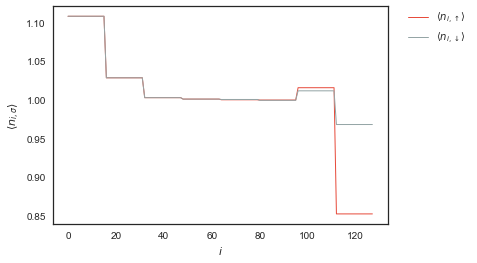

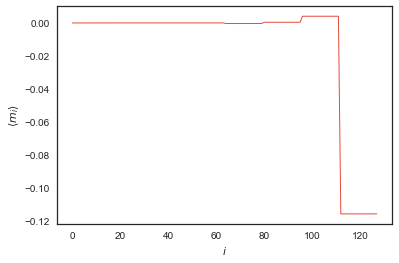

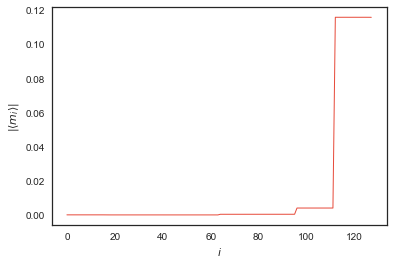

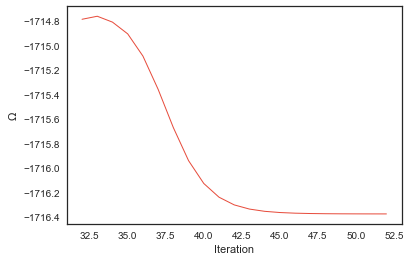

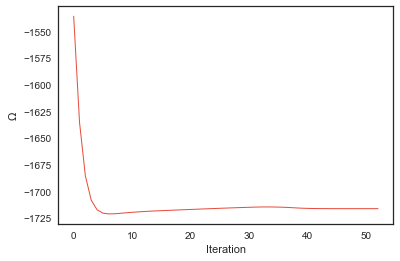

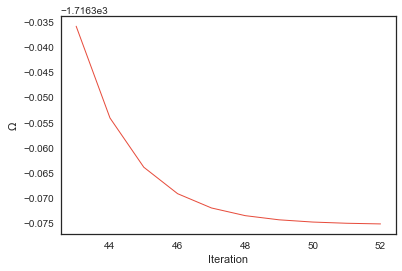

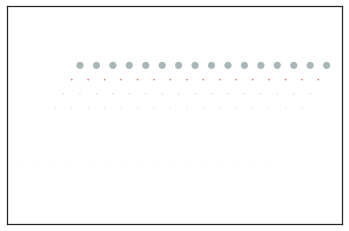

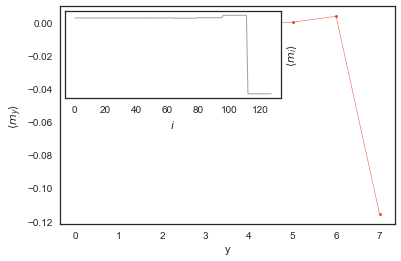

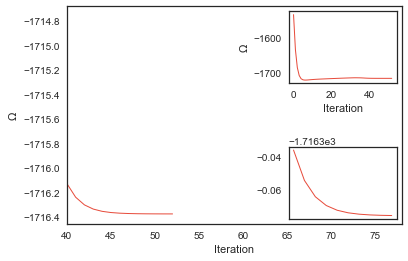

In [95]:
SAVEPLOTS = False
lastNit = 10
dotscale = 400
plotTMD(nUp, nDown, energies, itSwitch, Nx, Ny, lastNit, lastIt, dotscale)
print("Final energy: ", energies[lastIt - 1])

In [7]:
abs_t0 = 0.184

e1 = 1.046 / abs_t0
e2 = 2.104 / abs_t0
t0 = - 1
t1 = 0.401 / abs_t0
t2 = 0.507 / abs_t0
t11 = 0.218 / abs_t0
t12 = 0.338 / abs_t0
t22 = 0.057 / abs_t0

def Hribbon(k, Ny):
    Hrib = np.zeros((3 * Ny, 3 * Ny), dtype=np.complex64)
    
    h1 = np.array([
        
        [e1 + 2 * t0 * np.cos(k),
                    2.j * np.sin(k) * t1,
                    2 * t2 * np.cos(k)],
                   
              [-2.j * np.sin(k) * t1,
               e2 + 2 * t11 * np.cos(k),
               2.j * np.sin(k) * t12],
                   
              [2 * t2 * np.cos(k),
               -2.j * np.sin(k) * t12,
               e2 + 2 * t22 * np.cos(k)]
    
    ], dtype=np.complex64)

    h2 = np.array([
        
        [ 2 * t0 * np.cos(k/2) ,
         1.j * np.sin(k/2) * ( t1 - np.sqrt(3) * t2 ) ,
         -1. * np.cos(k/2) * ( np.sqrt(3) * t1 + t2 )] ,
        
              [ -1.j * np.sin(k/2) * ( t1 + np.sqrt(3) * t2 ),
               0.5 * np.cos(k/2) * ( t11 + 3 * t22 ),
               1.j * np.sin(k/2) * ( np.sqrt(3) / 2 * ( t22 - t11 ) - 2 * t12 ) ],
        
              [ np.cos(k/2) * ( np.sqrt(3) * t1 - t2 ),
               1.j * np.sin(k/2) * ( np.sqrt(3)/2 * ( t22 - t11 ) + 2 * t12 ),
               0.5 * np.cos(k/2) * ( 3 * t11 + t22 ) ]
    
    ], dtype=np.complex64)
    
    for y in range(1, Ny-1):
        Hrib[3*y:3*(y+1), 3*y:3*(y+1)] = h1
        Hrib[3*(y-1):3*y, 3*y:3*(y+1)] = (h2.conj()).T
        Hrib[3*(y+1):3*(y+2), 3*y:3*(y+1)] = h2

    Hrib[0:3, 0:3] = h1
    Hrib[3*(Ny-1):3*(Ny), 3*(Ny-1):3*(Ny)] = h1
    Hrib[3*(Ny-2):3*(Ny-1), 3*(Ny-1):3*Ny] = (h2.conj()).T
    Hrib[3:6, 0:3] = h2
    
    return Hrib

In [8]:
T = Hribbon(1, 4)
T.conj().T - T

array([[ 0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,
         0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,
         0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,
         0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.-0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,
         0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.-0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],


## Band structure

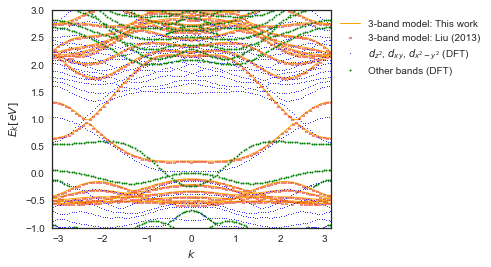

In [65]:
SAVEPLOTS = True

bandLiu=np.loadtxt("bandLiu2013.csv",delimiter=',')
bandBlue=np.loadtxt("bandsInBlue.csv",delimiter=',')
bandGreen=np.loadtxt("bandsInGreen.csv",delimiter=',')
sns.set_style("white")
W = 8
nks = 60
ks = np.linspace(-np.pi,np.pi, nks)
bandEn = np.zeros((nks,W*3))
for en, k in enumerate(ks):
    bandEn[en,:] = la.eigvalsh(Hribbon(k, W)) * abs_t0

plt.figure(1, figsize=(5, 4))
plt.plot(ks, bandEn, markersize=0, linewidth = 1, c = "orange", label = '3-band model: This work')
plt.plot(bandLiu[:,0],bandLiu[:,1], c="#e74c3c", marker='^', linewidth=0.0, markersize= 0.3, markeredgewidth = 2, label = '3-band model: Liu (2013)')
plt.plot(bandBlue[:,0],bandBlue[:,1], c="blue", marker='o', linewidth=0.0, markersize= 1., label = r'$d_{z^2}$, $d_{xy}$, $d_{x^2-y^2}$ (DFT)')
plt.plot(bandGreen[:,0],bandGreen[:,1], c="green", marker='o', linewidth=0.0, markersize= 2, label = 'Other bands (DFT)')
plt.xlabel(r'$k$')
plt.ylabel(r'$E_{k} [eV]$')
plt.xlim(-np.pi, np.pi)
plt.ylim(-1, 3)
plt.legend(bbox_to_anchor = (1,1))
if SAVEPLOTS == True:
    plt.savefig(SAVEDIR + SAVESUBDIR +"/BandStructureNanoribbonTMD.png", dpi = 600, bbox_inches='tight')
    
sns.set_style("white")

mathEn=np.loadtxt("bandEnsW=8.csv",delimiter=',')
W = 8
nks = 61
ks = np.linspace(-np.pi,np.pi, nks)
bandEnMath = np.zeros((nks,W*3))
bandEn = np.zeros((nks,W*3))
for en, k in enumerate(ks):
    Krib = Hribbon(k, W)
    bandEnMath[en,:] = mathEn[en]
    bandEn[en,:] =  la.eigvalsh(Krib) * 0.184

plt.figure(1, figsize=(5, 4))
plt.plot(ks, bandEnMath, c='b', marker='o', linewidth=0, markersize=2)
plt.plot(ks, bandEn, c='r', linewidth=0.3)
plt.xlabel(r'$k$')
plt.ylabel(r'$E_{k} [eV]$')
plt.xlim(-np.pi-0.05, np.pi+0.05)
plt.ylim(-1, 3)
if SAVEPLOTS == True:
    plt.savefig(SAVEDIR + SAVESUBDIR +"/BandStructureNanoribbonTMD-mathematica.png", dpi = 600, bbox_inches='tight')

In [120]:
Nx = 16
Ny = 8

N = nOrb * Nx * Ny

beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 40 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 8 # on-site interaction
muPHS = 3.5 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form
itMax = 100
it = 0
lbda = 0.5 / (1.1 * itMax) # the factor multiplied by itMax impedes P ( I ) < \delta
itSwitch = 0
dampFreq = 1
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

#nUp = np.array([1 , 0])
#for i in range(int(N/2) - 1):
#    nUp = np.concatenate((nUp, np.array([1, 0]) ))

#nDown = np.array([0, 1])
#for i in range(int(N/2) - 1):
#    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# F initial condition

#nUp = np.ones(3*Ny) - 0.1 * np.random.rand(3*Ny)

#nDown = np.zeros(3*Ny) + 0.1 * np.random.rand(3*Ny)

# Hybrid initial condition

nUp = np.zeros(3*Ny)
nDown = np.zeros(3*Ny)

spinFlipper = 0.5

for i in range(3*Ny):
    if i % (3) == 0:
        spinFlipper *= -1
    nUp[i] = 0.5 + spinFlipper *.1 * np.random.rand()
    nDown[i] = 0.5 - spinFlipper *.1 * np.random.rand()

# Paramagnetic

#nUp = np.ones(3*Ny) - 0.1 * np.random.rand(3*Ny)

#nDown = np.ones(3*Ny) + 0.1 * np.random.rand(3*Ny)


# Initialize energies
energies = np.zeros(itMax)

# Tolerance

delta = 1e-20

deltaUp = delta + 1
deltaDown = delta + 1

eUp = np.zeros((Nx, 3*Ny))
wUp = np.zeros((Nx, 3*Ny, 3*Ny), dtype=np.complex64)
eDown = np.zeros((Nx, 3*Ny))
wDown = np.zeros((Nx, 3*Ny, 3*Ny), dtype=np.complex64)

ks = np.linspace(-np.pi,np.pi, num=Nx, endpoint=False)

while (it < itMax and \
      deltaUp > delta and\
      deltaDown > delta): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    for kCount, k in enumerate(ks):
    
        C = - nUp * nDown
        
        K = Hribbon(k, Ny)
        
        Hup = K + U * np.eye(3*Ny) * ( nDown + C / 2 )
        Hdown = K + U * np.eye(3*Ny) * ( nUp + C / 2 )

        eUp[kCount, :], wUp[kCount, :, :] = la.eigh(Hup)
        eDown[kCount, :], wDown[kCount, :, :] = la.eigh(Hdown)

    nUpOld = nUp.copy()
    nDownOld = nDown.copy()

    for i in range(3*Ny):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(3*Ny):
            for q in range(Nx):
                nUp[i] += abs(wUp[q, i, n])**2 * fermi(eUp[q, n].real, mu , beta)
                nDown[i] += abs(wDown[q, i, n])**2 * fermi(eDown[q, n].real, mu, beta)
        nUp[i] /= Nx
        nDown[i] /= Nx
        
    # Damping
    if it % dampFreq == 0:
        nUp = ( 1 / 2 + lbda * it ) * nUp\
        + ( 1 / 2 - lbda * it) * nUpOld
        nDown = ( 1 / 2 + lbda * it ) * nDown\
        + ( 1 / 2 - lbda * it) * nDownOld

    deltaUp = np.dot(nUp - nUpOld, nUp - nUpOld) / (3*Ny)**2  
    deltaDown = np.dot(nDown - nDownOld, nDown - nDownOld) / (3*Ny)**2
    
    # To check convergence
    print('delta nUp: ', deltaUp)
    print('delta nDown: ', deltaDown)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum() ) / ( 3 * Ny ) )
    
    energies[it] = U * np.dot(nUp, nDown) / 3 / Ny + mu * (nUp + nDown).sum() / Ny/3\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1
    
lastIt = it

beta:  1.0
delta nUp:  0.000601658392726
delta nDown:  0.000567408613434
<n>:  0.82953907138
beta:  1.1
delta nUp:  0.000128694291135
delta nDown:  0.00011935095599
<n>:  0.744396442667
beta:  1.2100000000000002
delta nUp:  2.67474479239e-05
delta nDown:  2.42706889062e-05
<n>:  0.704009128745
beta:  1.3310000000000004
delta nUp:  5.68510161695e-06
delta nDown:  5.03561518062e-06
<n>:  0.68507195734
beta:  1.4641000000000004
delta nUp:  1.26658317971e-06
delta nDown:  1.09621112542e-06
<n>:  0.676282596896
beta:  1.6105100000000006
delta nUp:  3.0130711031e-07
delta nDown:  2.57375098606e-07
<n>:  0.672273643332
beta:  1.7715610000000008
delta nUp:  7.94711491116e-08
delta nDown:  6.99556975187e-08
<n>:  0.670504800182
beta:  1.9487171000000012
delta nUp:  2.48793771878e-08
delta nDown:  2.4994713875e-08
<n>:  0.669774862272
beta:  2.1435888100000016
delta nUp:  9.98906272226e-09
delta nDown:  1.25619532279e-08
<n>:  0.669518804402
beta:  2.357947691000002
delta nUp:  5.2655094528e-09


delta nUp:  2.17421413669e-19
delta nDown:  1.47213563784e-19
<n>:  0.671883457388
beta:  40
delta nUp:  4.81932333509e-19
delta nDown:  3.7778749452e-19
<n>:  0.671883457158
beta:  40
delta nUp:  5.67904105323e-19
delta nDown:  3.68429217961e-19
<n>:  0.671883458499
beta:  40
delta nUp:  2.2679735982e-19
delta nDown:  6.18600873713e-19
<n>:  0.671883458639
beta:  40
delta nUp:  3.74978724689e-19
delta nDown:  5.14338040452e-19
<n>:  0.671883457655
beta:  40
delta nUp:  2.67499724238e-19
delta nDown:  5.83832861406e-19
<n>:  0.671883457846
beta:  40
delta nUp:  3.76807670595e-19
delta nDown:  3.88974613187e-19
<n>:  0.671883458027
beta:  40
delta nUp:  5.59477177808e-19
delta nDown:  2.16106732995e-19
<n>:  0.671883457071
beta:  40
delta nUp:  5.07008827533e-19
delta nDown:  3.60199451346e-19
<n>:  0.671883456478
beta:  40
delta nUp:  3.71667430385e-19
delta nDown:  5.50851961566e-19
<n>:  0.671883457976
beta:  40
delta nUp:  6.65837614179e-19
delta nDown:  1.05299955442e-18
<n>:  0.67

In [121]:
nUpSite = np.zeros(Ny)
nDownSite = np.zeros(Ny)
for i in range(Ny):    
    nUpSite[i] = nUp[nOrb * i] + nUp[nOrb * i + 1] + nUp[nOrb * i + 2]
    nDownSite[i] = nDown[nOrb * i] + nDown[nOrb * i + 1] + nDown[nOrb * i + 2]

In [1]:
plt.plot((nUpSite-nDownSite), markersize=2, linewidth = 1, c = 'r')
plt.ylabel(r'$\left\langle m_y \right\rangle$')
plt.xlabel(r'$y$')

NameError: name 'plt' is not defined

Text(0.5,0,'Iteration')

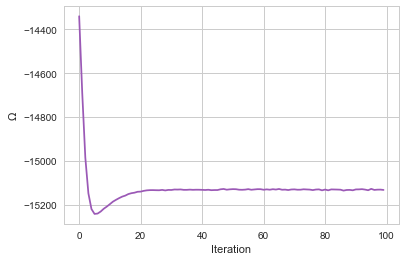

In [84]:
plt.plot(energies)
plt.ylabel(r'$\Omega$')
plt.xlabel('Iteration')

In [ ]:
beta0 = 1.1 # must be > 1, otherwise beta decreases
betaTarget = 20 # 99999 means infty ( T = 0 )
beta = beta0 # beta starts as beta0
inftyCutOff = 100 # above it, beta is practically infinity
t = 1 # hopping normalized to one
U = 4 # on-site interaction
muPHS = 12.7 # chemical potential
mu = ( muPHS + U / 2 ) # corresponding Fermi energy not in PHS form

itMax = 100
it = 0
lbda = 0.5 / (1.2 * itMax) # the factor multiplied by itMax impedes P ( I ) < \delta
itSwitch = 0
dampFreq = 10
# lbda is a parameter that reduces weight
# on the density obtained in the previous iteration 

#K = oneDimensionalChain(N)
K = - Hribbon(0, W)

# Set a seed for the random initial condition case
np.random.seed(1)

# AF initial condition

#nUp = np.array([1 , 0])
#for i in range(int(N/2) - 1):
#    nUp = np.concatenate((nUp, np.array([1, 0]) ))

#nDown = np.array([0, 1])
#for i in range(int(N/2) - 1):
#    nDown = np.concatenate((nDown, np.array([0, 1]) ))

# F initial condition

nUp = np.ones(3*Ny) - 0.1 * np.random.rand(3*Ny)

nDown = np.zeros(3*Ny) + 0.1 * np.random.rand(3*Ny)

# Hybrid initial condition

nUp = np.zeros(3*Ny)
nDown = np.zeros(3*Ny)

spinFlipper = 0.5

for i in range(3*Ny):
    if i % (3) == 0:
        spinFlipper *= -1
    nUp[i] = 0.5 + spinFlipper
    nDown[i] = 0.5 - spinFlipper

# Initialize energies
energies = np.zeros(itMax)

# Tolerance

delta = 1e-30

deltaUp = delta + 1
deltaDown = delta + 1

while (it < itMax and \
      deltaUp > delta and\
      deltaDown > delta): # add condition of convergence
    
    # Annealing
    
    if (beta < inftyCutOff \
        and beta < betaTarget) : # > infty: zero temperature case
        beta = beta0 ** it
        if beta > betaTarget:
            itSwitch = it
            print(itSwitch)
            beta = betaTarget
    else:
        beta = betaTarget
        
    print('beta: ', beta)

    C = - U * nUp * nDown
    
    Hup = - t * K + U * np.eye(3*Ny) * ( nDown + C / 2 / Ny / 3 )
    Hdown = - t * K + U * np.eye(3*Ny) * ( nUp + C / 2 / Ny / 3 )
    
    eUp, wUp = la.eig(Hup)
    eDown, wDown = la.eig(Hdown)
    
    nUpOld = nUp.copy()
    nDownOld = nDown.copy()
    
    for i in range(3*Ny):
        nUp[i] = 0
        nDown[i] = 0
        for n in range(3*Ny):
            nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, mu , beta)
            nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, mu, beta)
        
    # Damping
    if it % dampFreq == 0:
        nUp = ( 1 / 2 + lbda * it ) * nUp\
        + ( 1 / 2 - lbda * it) * nUpOld
        nDown = ( 1 / 2 + lbda * it ) * nDown\
        + ( 1 / 2 - lbda * it) * nDownOld

    deltaUp = np.dot(nUp - nUpOld, nUp - nUpOld) / (3*Ny)**2  
    deltaDown = np.dot(nDown - nDownOld, nDown - nDownOld) / (3*Ny)**2
    
    # To check convergence
    print('delta nUp: ', deltaUp)
    print('delta nDown: ', deltaDown)
    # Check if chemical potential is imposing
    # the right number of particles
    print('<n>: ', (nUp.sum() + nDown.sum()) / Ny/3 )
    
    energies[it] = U * np.dot(nUp, nDown) / Ny/3 + mu * (nUp + nDown).sum() / Ny/3\
    - 1 / beta * ( np.log( 1 + np.exp( - beta * ( eUp - mu ) ) ) + \
              np.log( 1 + np.exp( - beta * ( eDown - mu ) ) ) ).sum()
    
    it += 1
    
lastIt = it

In [ ]:
plt.plot(energies[itSwitch:])

In [ ]:
A = np.array([[1, 0],
            [0, 1]])

In [ ]:
lb = np.zeros((2, 2))
vec = np.zeros(((2,2,2)))
lb[0, :], vec[0, :, :] = la.eig(A)

In [ ]:
vec